In [1]:
#Utilities
from utils.utilities import gridsearch
import pandas as pd
from sklearn.pipeline import Pipeline
from utils.utilities import merge_dfs

#Preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

#Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR


In [2]:
model_dict = dict()

In [3]:
from utils.load import load_everthing
x,y = load_everthing()

In [4]:
preprocessing_list = [("normalize",Normalizer()), ("standardize",StandardScaler())]

model_dict = {
    "Linear_regressor": dict(),
    "Ridge_regressor": dict(),
    "Lasso_regressor": dict(),
    "ElasticNet_regressor": dict()
}

model_dict["SVM"]["param_grid"] = {
            "SVM__kernel": ["poly","linear"]
        }
model_dict["SVM"]["pipeline"] = [("StandardScaler",StandardScaler()),('SVM', SVR())]

model_dict["Random_forrest"]["param_grid"] = {
    "Random_forrest__max_depth": [10,25,100],
    "Random_forrest__n_estimators": [5,25,100]
}
model_dict["Random_forrest"]["pipeline"] = [("StandardScaler",StandardScaler()),("Random_forrest",RandomForestRegressor())]

In [5]:
model_dict["Linear_regressor"]["param_grid"] = {}
model_dict["Linear_regressor"]["pipeline"] =   [("StandardScaler",StandardScaler()),("Linear_regressor",LinearRegression())]

In [6]:
model_dict["Ridge_regressor"]["param_grid"] = {
    "Ridge_regressor__alpha": [1,10,25,100]
}
model_dict["Ridge_regressor"]["pipeline"] =   [("StandardScaler",StandardScaler()),("Ridge_regressor",Ridge(max_iter=10000))]

In [7]:
model_dict["Lasso_regressor"]["param_grid"] = {
}
model_dict["Lasso_regressor"]["pipeline"] =   [("StandardScaler",StandardScaler()),("Lasso_regressor",LassoCV(max_iter= 10000))]

In [8]:
model_dict["ElasticNet_regressor"]["param_grid"] = {
    "ElasticNet_regressor__alpha": [1,10,25,100]
}
model_dict["ElasticNet_regressor"]["pipeline"] =  [("StandardScaler",StandardScaler()),("ElasticNet_regressor",ElasticNet(max_iter=10000))]

In [9]:
#gridsearch(Pipeline(model_dict["ElasticNet_regressor"]["pipeline"]),model_dict["ElasticNet_regressor"]["param_grid"] )

In [10]:
model_dict.keys()

dict_keys(['Linear_regressor', 'Ridge_regressor', 'Lasso_regressor', 'ElasticNet_regressor'])

In [11]:
for key, val in model_dict.items():
    gridsearch(Pipeline(val["pipeline"]),val["param_grid"])

Loading in data
CosDist
running gridsearch
Best parameter (CV score=0.443):
{}
---------------------------------------------------------------------------
EucDist
running gridsearch
Best parameter (CV score=0.219):
{}
---------------------------------------------------------------------------
HetDist
running gridsearch
Best parameter (CV score=0.034):
{}
---------------------------------------------------------------------------
ManDist
running gridsearch
Best parameter (CV score=0.215):
{}
---------------------------------------------------------------------------
Loading in data
CosDist
running gridsearch
Best parameter (CV score=0.444):
{'Ridge_regressor__alpha': 100}
---------------------------------------------------------------------------
EucDist
running gridsearch
Best parameter (CV score=0.220):
{'Ridge_regressor__alpha': 100}
---------------------------------------------------------------------------
HetDist
running gridsearch
Best parameter (CV score=0.035):
{'Ridge_regresso

In [4]:
data = pd.read_csv("martin_runs/merged_df.csv")

In [5]:
data

,params,mean_test_score,dataset,model_file_name,pipeline,model_name
0,{'ElasticNet_regressor__alpha': 1},-0.013197,CosDist,models/test_1.pkl,"Pipeline(steps=[('StandardScaler', StandardSca...",ElasticNet()
1,{'ElasticNet_regressor__alpha': 10},-0.013197,CosDist,models/test_1.pkl,"Pipeline(steps=[('StandardScaler', StandardSca...",ElasticNet()
2,{'ElasticNet_regressor__alpha': 25},-0.013197,CosDist,models/test_1.pkl,"Pipeline(steps=[('StandardScaler', StandardSca...",ElasticNet()
3,{'ElasticNet_regressor__alpha': 100},-0.013197,CosDist,models/test_1.pkl,"Pipeline(steps=[('StandardScaler', StandardSca...",ElasticNet()
4,{},-0.013197,CosDist,models/test_9.pkl,"Pipeline(steps=[('poly_features', PolynomialFe...",ElasticNet()
...,...,...,...,...,...,...
117,{'ElasticNet_regressor__alpha': 25},-0.013197,ManDist,models/test_62.pkl,"Pipeline(steps=[('StandardScaler', StandardSca...",ElasticNet(max_iter=10000)
118,{'ElasticNet_regressor__alpha': 100},-0.013197,ManDist,models/test_62.pkl,"Pipeline(steps=[('StandardScaler', StandardSca...",ElasticNet(max_iter=10000)
119,{},-0.013197,EucDist,models/test_6.pkl,"Pipeline(steps=[('poly_features', PolynomialFe...",ElasticNet()
120,{},-0.013197,HetDist,models/test_7.pkl,"Pipeline(steps=[('poly_features', PolynomialFe...",ElasticNet()


In [6]:
data.sort_values("mean_test_score",ascending = False,inplace = True)

In [7]:
data.head(30)

,params,mean_test_score,dataset,model_file_name,pipeline,model_name
32,{},0.512892,CosDist,models/test_29.pkl,"Pipeline(steps=[('poly_features', PolynomialFe...",LassoCV()
24,{},0.504012,CosDist,models/test_25.pkl,"Pipeline(steps=[('poly_features', PolynomialFe...",LassoCV()
20,{},0.492929,CosDist,models/test_21.pkl,"Pipeline(steps=[('poly_features', PolynomialFe...",LassoCV()
98,{},0.444996,CosDist,models/test_55.pkl,"Pipeline(steps=[('StandardScaler', StandardSca...",LassoCV(max_iter=10000)
65,{'Ridge_regressor__alpha': 100},0.444341,CosDist,models/test_43.pkl,"Pipeline(steps=[('StandardScaler', StandardSca...",Ridge(max_iter=10000)
41,{'Ridge_regressor__alpha': 100},0.444341,CosDist,models/test_35.pkl,"Pipeline(steps=[('StandardScaler', StandardSca...",Ridge(max_iter=10000)
85,{'Ridge_regressor__alpha': 100},0.444341,CosDist,models/test_51.pkl,"Pipeline(steps=[('StandardScaler', StandardSca...",Ridge(max_iter=10000)
84,{'Ridge_regressor__alpha': 25},0.443718,CosDist,models/test_51.pkl,"Pipeline(steps=[('StandardScaler', StandardSca...",Ridge(max_iter=10000)
64,{'Ridge_regressor__alpha': 25},0.443718,CosDist,models/test_43.pkl,"Pipeline(steps=[('StandardScaler', StandardSca...",Ridge(max_iter=10000)
40,{'Ridge_regressor__alpha': 25},0.443718,CosDist,models/test_35.pkl,"Pipeline(steps=[('StandardScaler', StandardSca...",Ridge(max_iter=10000)


In [36]:
from joblib import load
clf = load('martin_models/test_55.pkl') 

In [37]:
clf.best_estimator_.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('Lasso_regressor', LassoCV(max_iter=10000))])>

In [38]:
x_l = list(x["CosDist"].values())

In [39]:
y_l = list(y.values())

In [40]:
index = list(range(len(x_l)))

In [41]:
import random
n = 50
index = random.sample(index, n)

In [42]:
x_final = [x_l[x] for x in index]

In [43]:
import numpy as np

labels = np.log10([y_l[x] for x in index])

In [44]:
pred = clf.best_estimator_.predict(x_final)

In [45]:
clf.best_estimator_.steps[-1][-1].coef_

array([-0.08788916, -0.13963118,  0.        ,  0.00102115,  0.15127062,
        0.02337887, -0.09463005, -0.        ,  0.        , -0.21267679,
        0.0012033 , -0.07150561, -0.02997362, -0.2529934 ,  0.07879646])

In [56]:
list(x["CosDist"].values())[0]

(0.2615069597140032,
 0.1901694814497119,
 0.0450528785589983,
 0.1043355342508008,
 0.2532704182565032,
 0.2117787788042623,
 0.1171956581247551,
 0.0749375345615424,
 0.2231011068513522,
 0.7111557549873084,
 0.1541632481430253,
 0.2541594688754314,
 0.0769898399442279,
 0.5326979412716893,
 0.1619754658344592)

In [46]:
[print(x) for x in clf.best_estimator_.steps[-1][-1].coef_]

-0.08788916169889494
-0.13963117513642304
0.0
0.0010211469196613574
0.1512706246850354
0.023378866862806384
-0.0946300496004666
-0.0
0.0
-0.21267679375531826
0.0012033000776747512
-0.07150560519726841
-0.02997361900881354
-0.252993396682485
0.07879645746349753


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [47]:
labels = [item for sublist in labels for item in sublist]

In [48]:
d = dict()
d["pred"] = list(pred)
d["labels"] = labels
df = pd.DataFrame(d)

In [49]:
df.sort_values("labels",inplace = True)

In [50]:
import matplotlib.pyplot as plt

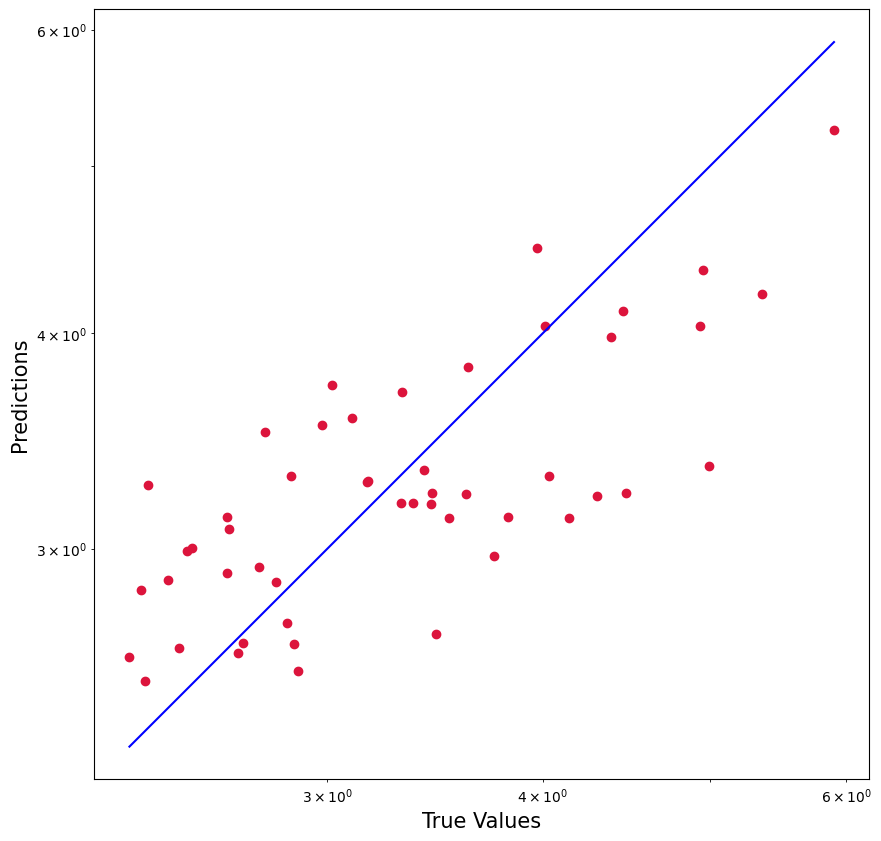

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(labels, pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred), max(labels))
p2 = min(min(pred), min(labels))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

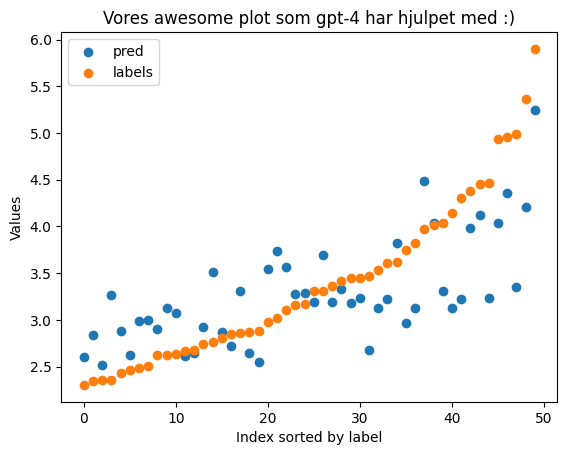

In [52]:

t = list(range(n))
plt.scatter(t, df["pred"], label = "pred")
plt.scatter(t,df["labels"], label = "labels")
plt.xlabel("Index sorted by label")
plt.ylabel("Values")
plt.title("Vores awesome plot som gpt-4 har hjulpet med :)")
plt.legend()
plt.show()

In [ ]:
#sorter listerne uafhængigt og plot dem. Altså så de er sorteret efter ranken

In [1]:
from utils.load import create_target_data
from utils.load import preprocess
from utils.load import df_to_list
from utils.load import create_label_dict
from utils.load import load
import os


In [2]:
def sort_by_country(file_name):
    if "Europe" in file_name:
        return "Europe"
    elif "Africa" in file_name:
        return "Africa"
    elif "Asia" in file_name:
        return "Asia"
    elif "Oceania" in file_name:
        return "Oceania"
    elif "Americas" in file_name:
        return "Americas"

In [3]:
from collections import defaultdict

In [4]:

def load_everthing_test():
    """Loads in everything so the data is ready to be used for training and transforming"""

    X_dict = dict()
    Y_dict = dict()
    d = dict()
    d["CosDist"] = defaultdict(list)
    d["EucDist"] = defaultdict(list)
    d["HetDist"] = defaultdict(list)
    d["ManDist"] = defaultdict(list)
    
    label_names, taget_data = create_target_data() 

    for file in os.listdir("data/fb_data_continents"):
        #We only look for csv files, not the other files
        if file.endswith(".csv"):
            #idk what these files are, so we skip them for now
            if file in ["FBCosDist.csv","FBEucDist.csv"]:
                continue
            
            df = load("data/fb_data_continents/" + file,",")
            df = preprocess(df)
            df = df_to_list(df)
            if "CosDist" in file:
                print(file)
                print(sort_by_country(file))
                d["CosDist"][sort_by_country(file)].append(df)
            elif "EucDist" in file:
                d["EucDist"][sort_by_country(file)].append(df)
            elif "HetDist" in file:
                d["HetDist"][sort_by_country(file)].append(df)
            elif "ManDist" in file:
                d["ManDist"][sort_by_country(file)].append(df)
    return d, "hej"
    for key,val in d.items():
        X_dict[key] = create_label_dict(label_names,val)
    
    Y_dict = create_label_dict(label_names, [taget_data])

    return X_dict, Y_dict

In [5]:
x, y = load_everthing()

(55, 227)


c:\Users\tjupp\Documents\GitHub\Bachelor\utils\load.py:112: UserWarning: The shape of the dataframe is likely to be wrong. Expected df.shape[1] == 3 or 226, but got (55, 227)
  warnings.warn(f"The shape of the dataframe is likely to be wrong. Expected df.shape[1] == 3 or 226, but got {pandas_dataframe.shape}")


UnboundLocalError: cannot access local variable 'final_df' where it is not associated with a value